
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Extended Data Figure 3
-----

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

-----
##### Set up input / output directories

In [3]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Load helper scripts

In [4]:
sys.path.append(str(root_dir))
import scripts.plotter as plotter
import scripts.utils as ut

-----
##### Load & prepare data 

In [5]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.tsv'), sep='\t', index_col=0)
kzm611_md.head(2)

,Patient_id,Cohort,State,Therapy,Sex,Type,Tumor_class,SBS,DBS,ID,Thr_State,Burden,Radiation
Sample_id,,,,,,,,,,,,,
KiCS0002_321321,KiCS0002,KiCS,Non-Primary,Post-Therapy,Female,GCT,Solid,15207,403,1117,Advanced-Treated,low,N
KiCS0003_285201,KiCS0003,KiCS,Non-Primary,Post-Therapy,Female,MFT,Solid,1596,7,175,Advanced-Treated,low,N


In [6]:
sbs_high_threshold = 25000
dbs_high_threshold = 50.5
id_mid_threshold = 176
id_high_threshold = 3085

In [9]:
kzm611_md['sbs_hue'] = ['Low' if kzm611_md.loc[x, 'SBS']<sbs_high_threshold else 'High' for x in kzm611_md.index]
kzm611_md['dbs_hue'] = ['Low' if kzm611_md.loc[x, 'DBS']<dbs_high_threshold else 'High' for x in kzm611_md.index]
kzm611_md['id_hue'] = ['Low' if kzm611_md.loc[x, 'ID']<id_mid_threshold else 'High' if \
                       kzm611_md.loc[x, 'ID']>id_high_threshold else 'Mid' for x in kzm611_md.index]
kzm611_md.head(2)

,Patient_id,Cohort,State,Therapy,Sex,Type,Tumor_class,SBS,DBS,ID,Thr_State,Burden,Radiation,sbs_hue,dbs_hue,id_hue
Sample_id,,,,,,,,,,,,,,,,
KiCS0002_321321,KiCS0002,KiCS,Non-Primary,Post-Therapy,Female,GCT,Solid,15207,403,1117,Advanced-Treated,low,N,Low,High,Mid
KiCS0003_285201,KiCS0003,KiCS,Non-Primary,Post-Therapy,Female,MFT,Solid,1596,7,175,Advanced-Treated,low,N,Low,Low,Low


In [10]:
kzm611_md['sbs_log'] = np.log10(kzm611_md.SBS+0.0000000000000000001)
kzm611_md['dbs_log'] = np.log10(kzm611_md.DBS+0.0000000000000000001)
kzm611_md['id_log'] = np.log10(kzm611_md.ID+0.0000000000000000001)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90')])

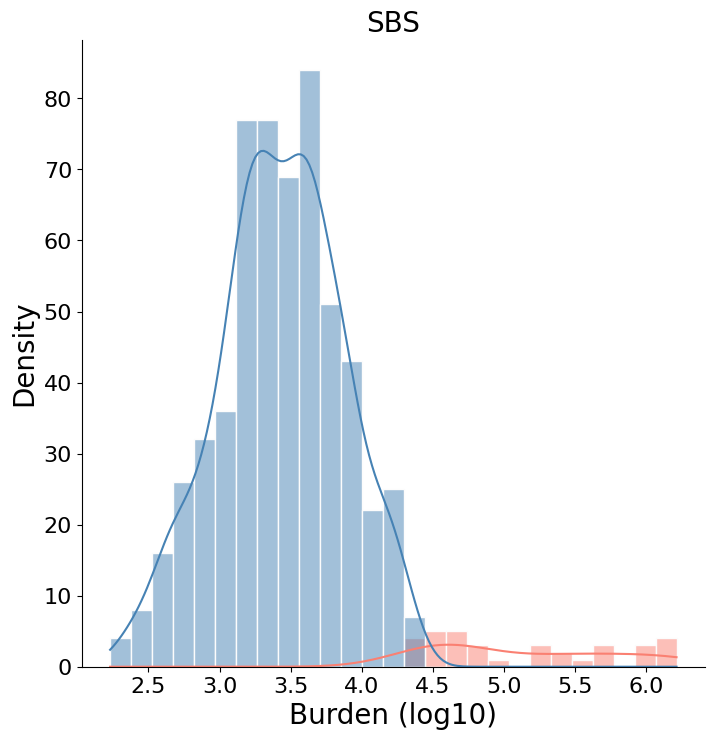

In [7]:
horder = ['Low', 'High']
sns.displot(data=kzm611_md, x='sbs_log', hue="sbs_hue", 
            palette = sns.color_palette(palette = ["SteelBlue" , "Salmon"]),
            kde=True, height=7, aspect=1, edgecolor=".99", hue_order=horder, legend=False)
plt.ylabel('Density', fontsize=20)
plt.xlabel('Burden (log10)', fontsize=20)
plt.title('SBS', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(os.path.join(fig_out, 'ExFig_3a.pdf'), bbox_inches="tight")

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

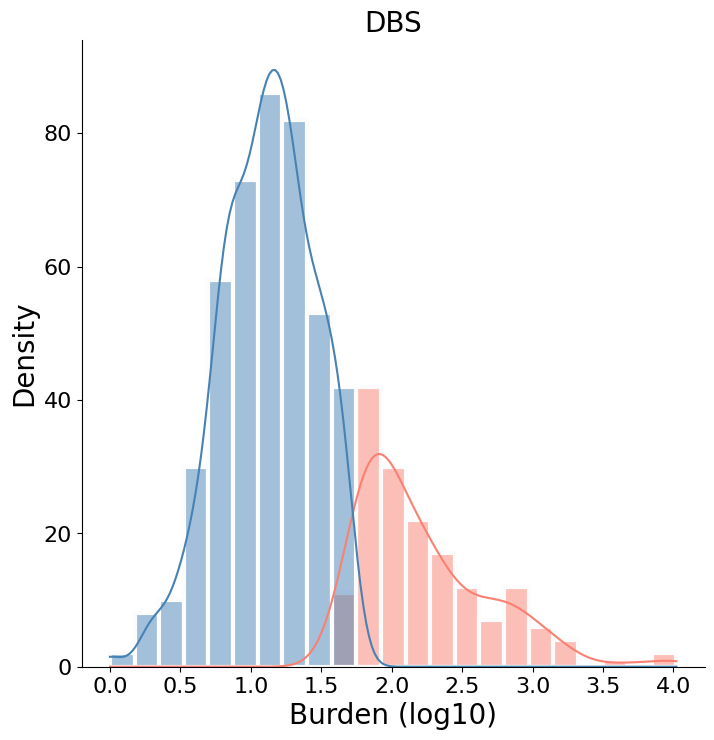

In [8]:
horder = ['Low', 'High']
## 'I-H-136062-T1-1-D1-1' has 0 DBS
sns.displot(data=kzm611_md.drop('I-H-136062-T1-1-D1-1', axis=0), x='dbs_log', hue="dbs_hue", linewidth=3,
            hue_order=horder,
            palette = sns.color_palette(palette = ["SteelBlue" , "Salmon"]),
            kde=True, height=7, aspect=1, edgecolor=".99", legend=False)
plt.ylabel('Density', fontsize=20)
plt.xlabel('Burden (log10)', fontsize=20)
plt.title('DBS', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(os.path.join(fig_out, 'ExFig_3b.pdf'), bbox_inches="tight")

[None, None]

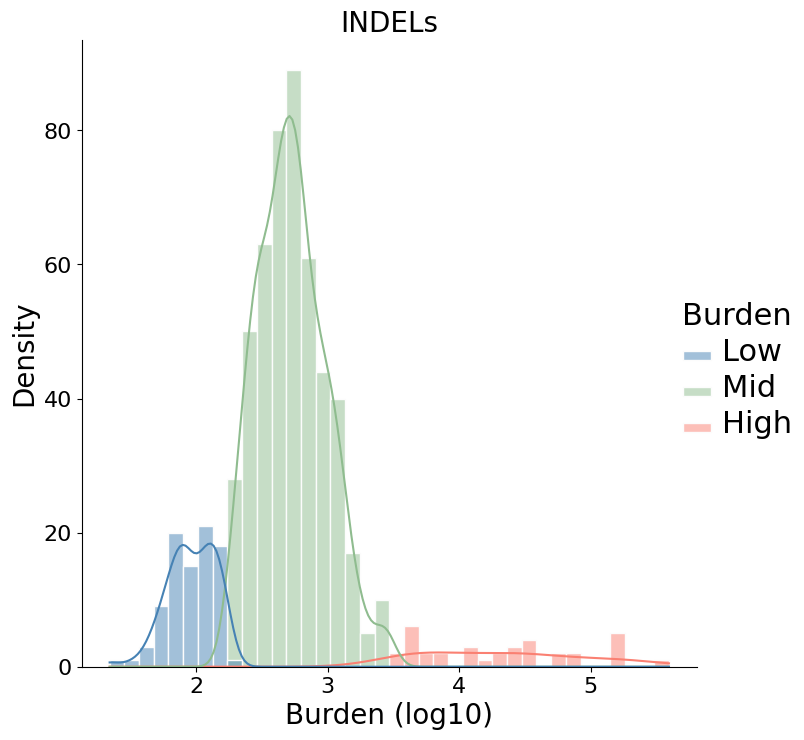

In [9]:
horder = ['Low', 'Mid', 'High']
g = sns.displot(data=kzm611_md, x='id_log', hue="id_hue",# linewidth=3,
                hue_order=horder,
            palette = sns.color_palette(palette = ["SteelBlue" , "darkseagreen", "Salmon"]),
            kde=True, height=7, aspect=1, edgecolor=".99")#, facecolor=(0, 0, 0, 0))

plt.ylabel('Density', fontsize=20)
plt.xlabel('Burden (log10)', fontsize=20)
plt.title('INDELs', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g._legend.set_title('Burden')

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=22)
plt.savefig(os.path.join(fig_out, 'ExFig_3c.pdf'), bbox_inches="tight")

In [7]:
kzm_sigs = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_signatures.tsv'), sep='\t', index_col=0)
kzm_sigs.head(2)

,SBS1,SBS2,SBS5,SBS7a,SBS7b,SBS8,SBS10a,SBS10b,SBS11,SBS12,...,ID17,ID83L1,ID83I1,ID83I2,ID83I3/H1,ID83H2,ID83H3,ID83H4,ID83I4/H5,Unassigned_SBS
I-H-108298-T1-1-D1-1,0,0,2469,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I-H-108317-T1-1-D1-1,571,0,1695,0,0,989,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


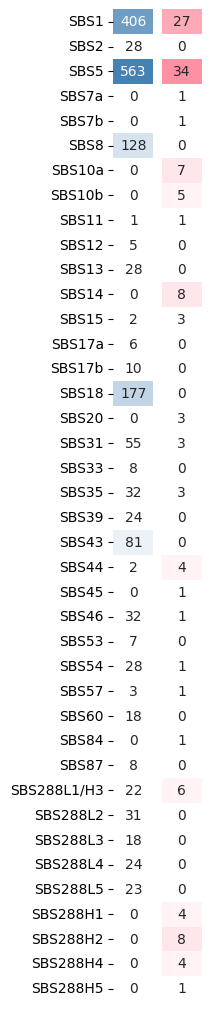

In [11]:
sbs_counts = ut.get_sig_counts(kzm_sigs, kzm611_md, 'SBS')
plotter.plot_sig_counts(sbs_counts, 'ExFig_3d_rev.pdf')

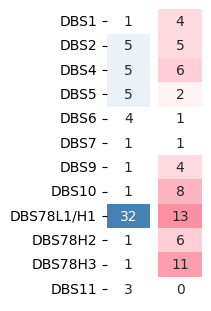

In [29]:
dbs_counts = ut.get_sig_counts(kzm_sigs, kzm611_md, 'DBS')
plotter.plot_sig_counts(dbs_counts, 'ExFig_3e.pdf')

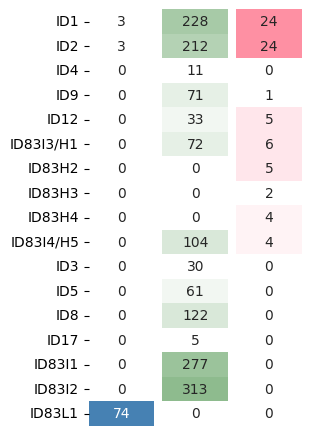

In [30]:
id_counts = ut.get_sig_counts(kzm_sigs, kzm611_md, 'ID')
plotter.plot_sig_counts(id_counts, 'ExFig_3f.pdf')